In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import requests
import json

In [2]:
#load in csv
olympics_data = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding="latin-1")
olympics_data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [3]:
medal_dict = {'Gold':3,'Silver':2,'Bronze':1}
olympics_data['Points'] = olympics_data['Medal'].map(medal_dict)

In [4]:
olympics_data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Points
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,2.0
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,1.0
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,3.0
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,2.0
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze,1.0
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold,3.0
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver,2.0
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold,3.0


# Country Performance 
 (Weighted by Medal Points)


In [5]:
# Groupby Country & Sport

medals_x_country_sp = olympics_data.groupby(['Country', 'Sport'])

medals_x_country_sp

In [6]:
medals_x_country_sp.describe()

Year                                                 \
                      count         mean       std     min     25%     50%   
Country     Sport                                                            
Afghanistan Taekwondo   1.0  2008.000000       NaN  2008.0  2008.0  2008.0   
Algeria     Athletics   6.0  1998.000000  3.346640  1992.0  1997.0  2000.0   
            Boxing      6.0  1992.000000  6.693280  1984.0  1986.0  1994.0   
            Judo        2.0  2008.000000  0.000000  2008.0  2008.0  2008.0   
Argentina   Aquatics    1.0  2004.000000       NaN  2004.0  2004.0  2004.0   
...                     ...          ...       ...     ...     ...     ...   
Yugoslavia  Wrestling   9.0  1982.222222  4.055175  1976.0  1980.0  1984.0   
Zambia      Athletics   1.0  1996.000000       NaN  1996.0  1996.0  1996.0   
            Boxing      1.0  1984.000000       NaN  1984.0  1984.0  1984.0   
Zimbabwe    Aquatics    7.0  2006.285714  2.138090  2004.0  2004.0  2008.0   
            Hockey     16.0  1980.000000  0.000000  1980.0  1980.0  1980.0   

                                      Points                                 \
                          75%     max  count      mean       std  min   25%   
Country     Sport                                                             
Afghanistan Taekwondo  2008.0  2008.0    1.0  1.000000       NaN  1.0  1.00   
Algeria     Athletics  2000.0  2000.0    6.0  2.166667  0.983192  1.0  1.25   
            Boxing     1996.0  2000.0    6.0  1.333333  0.816497  1.0  1.00   
            Judo       2008.0  2008.0    2.0  1.500000  0.707107  1.0  1.25   
Argentina   Aquatics   2004.0  2004.0    1.0  1.000000       NaN  1.0  1.00   
...                       ...     ...    ...       ...       ...  ...   ...   
Yugoslavia  Wrestling  1984.0  1988.0    9.0  2.000000  0.866025  1.0  1.00   
Zambia      Athletics  1996.0  1996.0    1.0  2.000000       NaN  2.0  2.00   
            Boxing     1984.0  1984.0    1.0  1.000000       NaN  1.0  1.00   
Zimbabwe    Aquatics   2008.0  2008.0    7.0  2.142857  0.690066  1.0  2.00   
            Hockey     1980.0  1980.0   16.0  3.000000  0.000000  3.0  3.00   

                                       
                       50%   75%  max  
Country     Sport                      
Afghanistan Taekwondo  1.0  1.00  1.0  
Algeria     Athletics  2.5  3.00  3.0  
            Boxing     1.0  1.00  3.0  
            Judo       1.5  1.75  2.0  
Argentina   Aquatics   1.0  1.00  1.0  
...                    ...   ...  ...  
Yugoslavia  Wrestling  2.0  3.00  3.0  
Zambia      Athletics  2.0  2.00  2.0  
            Boxing     1.0  1.00  1.0  
Zimbabwe    Aquatics   2.0  2.50  3.0  
            Hockey     3.0  3.00  3.0  

[828 rows x 16 columns]

In [7]:
# Create dataframe

medals_by_sport = medals_x_country_sp['Medal'].count()

medals_by_sport

point_total= medals_x_country_sp['Points'].sum()

In [8]:
medal_summary = pd.DataFrame({'Medals By Sport': medals_by_sport, 'Point Total': point_total})

medal_summary

Medals By Sport  Point Total
Country     Sport                                  
Afghanistan Taekwondo                1          1.0
Algeria     Athletics                6         13.0
            Boxing                   6          8.0
            Judo                     2          3.0
Argentina   Aquatics                 1          1.0
...                                ...          ...
Yugoslavia  Wrestling                9         18.0
Zambia      Athletics                1          2.0
            Boxing                   1          1.0
Zimbabwe    Aquatics                 7         15.0
            Hockey                  16         48.0

[828 rows x 2 columns]

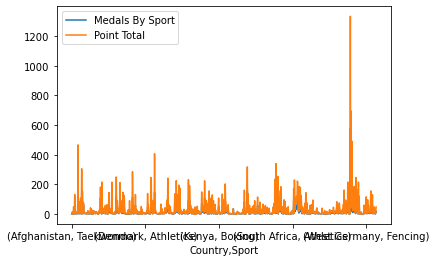

In [9]:
# Plot the Sum of Medal Points

medal_summary.plot.line(x=None, y=None)

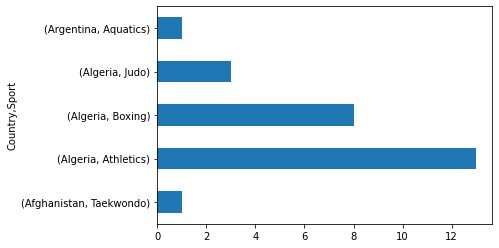

In [10]:
# Graph Cleanup

# change the plot to a horizontal bar graph

medals_x_country_sp['Points'].sum().head(5).plot(kind='barh')

In [11]:
# reset the index

sports_data= medals_x_country_sp['Points'].sum().reset_index()

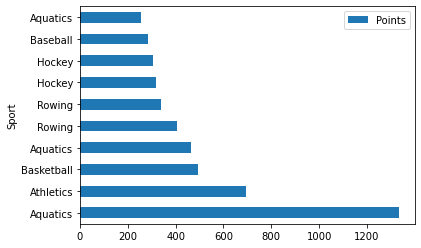

In [12]:
# sort values

sports_data.sort_values(['Points'], ascending=False).head(10).plot(kind='barh', y='Points', x='Sport')

In [13]:
# display Individual Sports

sports_data['Sport'].unique()

array(['Taekwondo', 'Athletics', 'Boxing', 'Judo', 'Aquatics',
       'Basketball', 'Cycling', 'Football', 'Hockey', 'Sailing', 'Tennis',
       'Volleyball', 'Weightlifting', 'Wrestling', 'Archery', 'Baseball',
       'Canoe / Kayak', 'Equestrian', 'Gymnastics', 'Rowing', 'Shooting',
       'Softball', 'Triathlon', 'Modern Pentathlon', 'Badminton',
       'Fencing', 'Handball', 'Table Tennis'], dtype=object)

In [14]:
# describe Individual Sports

sports_data['Sport'].describe()

count           828
unique           28
top       Athletics
freq             77
Name: Sport, dtype: object

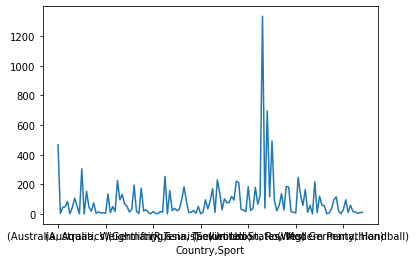

In [15]:
# Plot the sum of the medal points for chosen countries by sport

sports = ['Gymnastics', 'Basketball', 'Aquatics', 'Sailing', 'Athletics']
countries = ['West Germany', 'Soviet Union', 'United States', 'Australia', 'Germany', 'Russia']
sport_df = olympics_data.loc[olympics_data['Country'].isin(countries)]
sport_df

# group by Country Code and Sport
sport_df.groupby(['Country', 'Sport'])['Points'].sum().plot() 

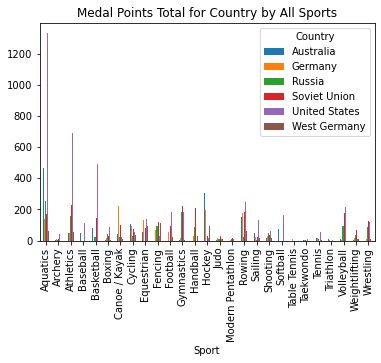

In [87]:
# Unstack & plot as bar graph

sport_df.groupby(['Sport', 'Country'])['Points'].sum().unstack().plot(kind='bar', title='Medal Points Total for Country by All Sports')
plt.savefig('images/Medal Points Total for Country by All Sports.png', dpi=300)

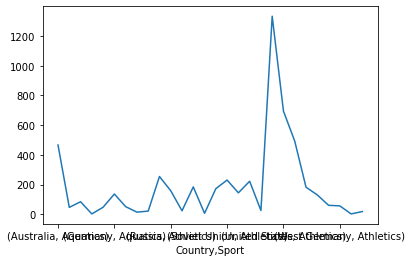

In [18]:
# Refine data and Plot chosen Sports

limited_sports = sport_df.loc[sport_df['Sport'].isin(sports)]
limited_sports

#  group Medal Points by Country Code and Sport

limited_sports.groupby(['Country', 'Sport'])['Points'].sum().plot()

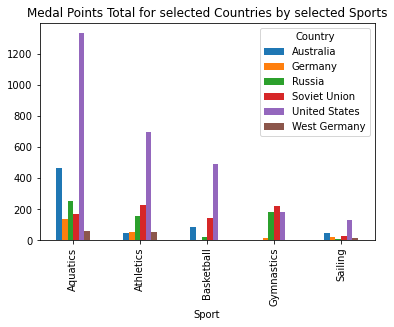

In [85]:
# Unstack and Plot as bar graph

limited_sports.groupby(['Sport', 'Country'])['Points'].sum().unstack().plot(kind='bar', title='Medal Points Total for selected Countries by selected Sports')
plt.savefig("images/Medal_Points_Total_for_selected_Countries_by_selected_Sports.png", dpi=300, bbox_inches='tight')

In [21]:
# Groupby Year & Country 

medals_x_country_yr = olympics_data.groupby(['Year', 'Country'])
medals_x_country_yr

In [22]:
#Create dataframe

medals_by_yr = medals_x_country_yr['Points'].sum()

In [23]:
year_stats = pd.DataFrame({'Point Total': medals_by_yr})
year_stats

Point Total
Year   Country                   
1976.0 Australia             40.0
       Austria                1.0
       Belgium               12.0
       Bermuda*               1.0
       Brazil                 3.0
...                           ...
2008.0 United States        674.0
       Uzbekistan            10.0
       Venezuela              1.0
       Vietnam                2.0
       Zimbabwe               9.0

[559 rows x 1 columns]

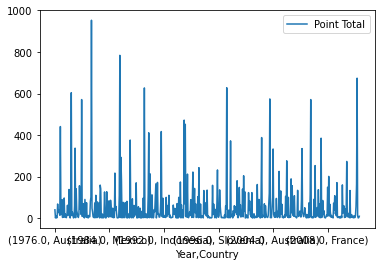

In [24]:
# Plot the Sum of Medal Points

year_stats.plot.line(x=None, y=None)

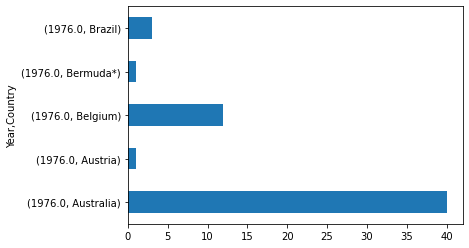

In [25]:
# Graph Cleanup

# change the plot to a horizontal bar graph

medals_x_country_yr['Points'].sum().head(5).plot(kind='barh')

In [26]:
# reset the index

country_data= medals_x_country_yr['Points'].sum().reset_index()

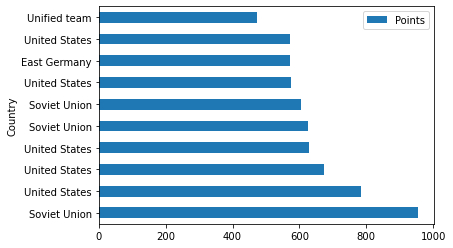

In [27]:
# sort values

country_data.sort_values(['Points'], ascending=False).head(10).plot(kind='barh', y='Points', x='Country')

In [28]:
# display Individual Countries

country_data['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Bermuda*', 'Brazil',
       'Bulgaria', 'Canada', 'Cuba', 'Czechoslovakia', 'Denmark',
       'East Germany', 'Finland', 'France', 'Hungary', 'Iran', 'Italy',
       'Jamaica', 'Japan', 'Korea, North', 'Korea, South', 'Mexico',
       'Mongolia', 'Netherlands', 'New Zealand', 'Norway', 'Pakistan',
       'Poland', 'Portugal', 'Puerto Rico*', 'Romania', 'Soviet Union',
       'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Trinidad and Tobago', 'United Kingdom', 'United States',
       'Venezuela', 'West Germany', 'Yugoslavia', 'Ethiopia', 'Greece',
       'Guyana', 'India', 'Ireland', 'Lebanon', 'Tanzania', 'Uganda',
       'Zimbabwe', 'Algeria', 'Cameroon', 'China', 'Colombia',
       "Cote d'Ivoire", 'Dominican Republic', 'Egypt', 'Iceland', 'Kenya',
       'Morocco', 'Nigeria', 'Peru', 'Syria', 'Taiwan', 'Turkey',
       'Zambia', 'Argentina', 'Chile', 'Costa Rica', 'Djibouti',
       'Indonesia', 'Netherlands Antilles*', 'Philippines

In [29]:
# describe Individual Countries

country_data['Country'].describe()

count       559
unique      127
top       Italy
freq          9
Name: Country, dtype: object

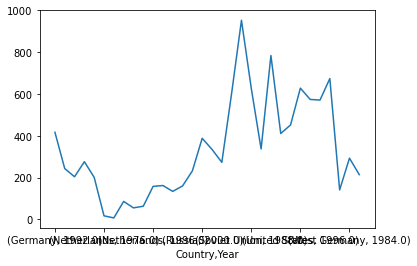

In [30]:
# Refine data and Plot chosen countrys

countries_2 = ['West Germany', 'Soviet Union', 'United States', 'Netherlands', 'Germany', 'Russia']

year_df = olympics_data.loc[olympics_data['Country'].isin(countries_2)]
year_df

#  group Medal Points by Country and Year
year_df.groupby(['Country', 'Year'])['Points'].sum().plot() 

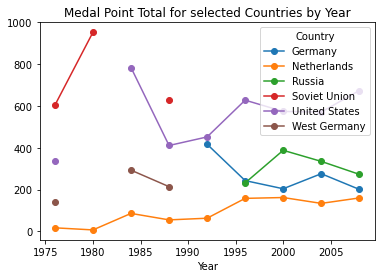

In [86]:
# Unstack and Plot as line graph

year_df.groupby(['Year', 'Country'])['Points'].sum().unstack().plot(title='Medal Point Total for selected Countries by Year', marker='o')
plt.savefig("images/Medal_Point_Total_for_selected_Countries_by_Year.png", dpi=300, bbox_inches='tight')

In [33]:
year_df.groupby(['Year', 'Country'])['Points'].sum()

Year    Country      
1976.0  Netherlands       17.0
        Soviet Union     604.0
        United States    337.0
        West Germany     141.0
1980.0  Netherlands        7.0
        Soviet Union     953.0
1984.0  Netherlands       86.0
        United States    784.0
        West Germany     293.0
1988.0  Netherlands       55.0
        Soviet Union     627.0
        United States    411.0
        West Germany     214.0
1992.0  Germany          417.0
        Netherlands       63.0
        United States    452.0
1996.0  Germany          243.0
        Netherlands      158.0
        Russia           232.0
        United States    628.0
2000.0  Germany          204.0
        Netherlands      162.0
        Russia           388.0
        United States    574.0
2004.0  Germany          276.0
        Netherlands      134.0
        Russia           335.0
        United States    571.0
2008.0  Germany          201.0
        Netherlands      160.0
        Russia           273.0
        United St

#  Change in Performance of Top Four by Olympic Year

In [34]:
#show the top scorers without grouping Russia/Soviet Union and Germany/West Germanys

top_score = olympics_data.groupby("Country")["Points"].sum()
top_score_df = pd.DataFrame(top_score)
top_score_sort_df = top_score_df.sort_values(by=['Points'], ascending=False)
top_score_sort_df.head()

,Points
Country,
United States,4431.0
Soviet Union,2184.0
Australia,1500.0
China,1399.0
East Germany,1388.0


In [35]:
#create a DataFrame with only needed info
ycp_df = olympics_data[["Year", "Points", "Country"]]
ycp_df

,Year,Points,Country
0,1976.0,2.0,East Germany
1,1976.0,1.0,Soviet Union
2,1976.0,3.0,United States
3,1976.0,2.0,Italy
4,1976.0,1.0,United States
...,...,...,...
15428,2008.0,1.0,France
15429,2008.0,3.0,Georgia
15430,2008.0,2.0,Azerbaijan
15431,2008.0,3.0,France


In [36]:
#find total points of Russia/Soviet Union to see if it is in top 4
russia_ussr = ["Russia", "Soviet Union"]
russia_ussr_df = ycp_df[ycp_df["Country"].isin(russia_ussr)]
russia_ussr_points = russia_ussr_df["Points"].sum()
print(f"total of Russia/Soviet Union points: {russia_ussr_points}")

total of Russia/Soviet Union points: 3412.0


In [37]:
#find total points of Germany/West Germany to see if it is in top 4
germany_frd = ["Germany", "West Germany"]
germany_frd_df= ycp_df[ycp_df["Country"].isin(germany_frd)]
germany_frd_points = germany_frd_df["Points"].sum()
print(f"total of German/West German points {germany_frd_points}")

total of German/West German points 1989.0


In [38]:
#rename Soviet Union and Russia to Soviet Union/Russia
ycp_df["Country"] = ycp_df["Country"].replace(["Soviet Union"], "Soviet Union/Russia")
ycp_df["Country"] = ycp_df["Country"].replace(["Russia"], "Soviet Union/Russia")
#rename West Germany and Germany to West Germany/Germany
ycp_df["Country"] = ycp_df["Country"].replace(["West Germany"], "West Germany/Germany")
ycp_df["Country"] = ycp_df["Country"].replace(["Germany"], "West Germany/Germany")

C:\Users\rbvan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rbvan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rbvan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [39]:
#create a DataFrame with only the top 4 Countries
topfour = ["United States", "Soviet Union/Russia", "West Germany/Germany", "Australia"]
top_four = ycp_df[ycp_df["Country"].isin(topfour)]
top_four

,Year,Points,Country
1,1976.0,1.0,Soviet Union/Russia
2,1976.0,3.0,United States
4,1976.0,1.0,United States
5,1976.0,2.0,United States
6,1976.0,3.0,Soviet Union/Russia
...,...,...,...
15413,2008.0,3.0,Soviet Union/Russia
15420,2008.0,1.0,United States
15422,2008.0,3.0,Soviet Union/Russia
15426,2008.0,2.0,West Germany/Germany


In [40]:
#group the DataFrame by Year and Country to get each countries total points for each Olympic Year 
top_four_points = top_four.groupby(["Year","Country"])["Points"].sum()
top_four_points_df = pd.DataFrame(top_four_points)
top_four_points_df

Points
Year   Country                     
1976.0 Australia               40.0
       Soviet Union/Russia    604.0
       United States          337.0
       West Germany/Germany   141.0
1980.0 Australia               24.0
       Soviet Union/Russia    953.0
1984.0 Australia               78.0
       United States          784.0
       West Germany/Germany   293.0
1988.0 Australia               76.0
       Soviet Union/Russia    627.0
       United States          411.0
       West Germany/Germany   214.0
1992.0 Australia              112.0
       United States          452.0
       West Germany/Germany   417.0
1996.0 Australia              212.0
       Soviet Union/Russia    232.0
       United States          628.0
       West Germany/Germany   243.0
2000.0 Australia              372.0
       Soviet Union/Russia    388.0
       United States          574.0
       West Germany/Germany   204.0
2004.0 Australia              333.0
       Soviet Union/Russia    335.0
       United States          571.0
       West Germany/Germany   276.0
2008.0 Australia              253.0
       Soviet Union/Russia    273.0
       United States          674.0
       West Germany/Germany   201.0

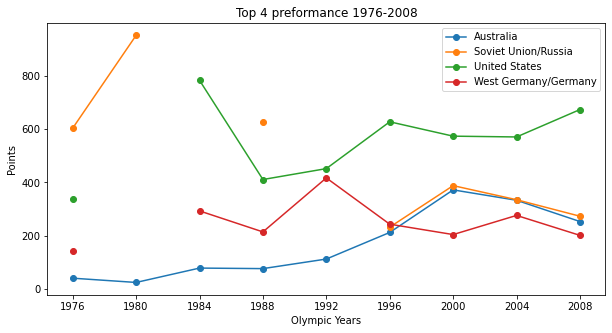

In [41]:
#create a line plot
top_four_points_df.unstack().plot(figsize=(10,5), marker = "o")
#get list of years for x axis
year = top_four["Year"].unique()
plt.xticks(year)
plt.xlabel("Olympic Years")
plt.ylabel("Points")
plt.title("Top 4 preformance 1976-2008")
plt.legend(["Australia","Soviet Union/Russia", "United States", "West Germany/Germany"])
plt.savefig("images/top_four_preformance.png")
plt.show()



In [42]:
utfp = top_four_points.unstack()
utfp

Country,Australia,Soviet Union/Russia,United States,West Germany/Germany
Year,,,,
1976.0,40.0,604.0,337.0,141.0
1980.0,24.0,953.0,NaN,NaN
1984.0,78.0,NaN,784.0,293.0
1988.0,76.0,627.0,411.0,214.0
1992.0,112.0,NaN,452.0,417.0
1996.0,212.0,232.0,628.0,243.0
2000.0,372.0,388.0,574.0,204.0
2004.0,333.0,335.0,571.0,276.0
2008.0,253.0,273.0,674.0,201.0


In [43]:
#create a DataFrame that contains Year, Points, Country, and Gender
ycpg_df = olympics_data[["Year", "Points", "Country", "Gender"]]
ycpg_df

,Year,Points,Country,Gender
0,1976.0,2.0,East Germany,Women
1,1976.0,1.0,Soviet Union,Men
2,1976.0,3.0,United States,Men
3,1976.0,2.0,Italy,Men
4,1976.0,1.0,United States,Women
...,...,...,...,...
15428,2008.0,1.0,France,Men
15429,2008.0,3.0,Georgia,Men
15430,2008.0,2.0,Azerbaijan,Men
15431,2008.0,3.0,France,Men


In [44]:
#rename Soviet Union and Russia to Soviet Union/Russia
ycpg_df["Country"] = ycpg_df["Country"].replace(["Soviet Union"], "Soviet Union/Russia")
ycpg_df["Country"] = ycpg_df["Country"].replace(["Russia"], "Soviet Union/Russia")
#rename West Germany and Germany to West Germany/Germany
ycpg_df["Country"] = ycpg_df["Country"].replace(["West Germany"], "West Germany/Germany")
ycpg_df["Country"] = ycpg_df["Country"].replace(["Germany"], "West Germany/Germany")

#create a DataFrame containing Top 4
topfourg = ["United States", "Soviet Union/Russia", "West Germany/Germany", "Australia"]
top_fourg = ycpg_df[ycpg_df["Country"].isin(topfour)]
top_fourg

C:\Users\rbvan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rbvan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rbvan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Year,Points,Country,Gender
1,1976.0,1.0,Soviet Union/Russia,Men
2,1976.0,3.0,United States,Men
4,1976.0,1.0,United States,Women
5,1976.0,2.0,United States,Men
6,1976.0,3.0,Soviet Union/Russia,Women
...,...,...,...,...
15413,2008.0,3.0,Soviet Union/Russia,Men
15420,2008.0,1.0,United States,Men
15422,2008.0,3.0,Soviet Union/Russia,Men
15426,2008.0,2.0,West Germany/Germany,Men


In [45]:
#create DataFrames for each gender
top_four_w = top_fourg[top_fourg["Gender"]==("Women")]
top_four_m = top_fourg[top_fourg["Gender"]==("Men")]

In [46]:
#group each DataFrame by Year and Country
top_four_points_w = top_four_w.groupby(["Year","Country"])["Points"].sum()
top_four_points_w_df = pd.DataFrame(top_four_points_w)

top_four_points_m = top_four_m.groupby(["Year","Country"])["Points"].sum()
top_four_points_m_df = pd.DataFrame(top_four_points_m)

print(top_four_points_w_df)
print(top_four_points_m_df)

                             Points
Year   Country                     
1976.0 Soviet Union/Russia    230.0
       United States           90.0
       West Germany/Germany    21.0
1980.0 Australia                4.0
       Soviet Union/Russia    297.0
1984.0 Australia               15.0
       United States          300.0
       West Germany/Germany    86.0
1988.0 Australia               56.0
       Soviet Union/Russia    161.0
       United States          137.0
       West Germany/Germany    46.0
1992.0 Australia               19.0
       United States          184.0
       West Germany/Germany   162.0
1996.0 Australia              124.0
       Soviet Union/Russia     57.0
       United States          347.0
       West Germany/Germany    92.0
2000.0 Australia              193.0
       Soviet Union/Russia    178.0
       United States          290.0
       West Germany/Germany    99.0
2004.0 Australia              130.0
       Soviet Union/Russia    188.0
       United States        

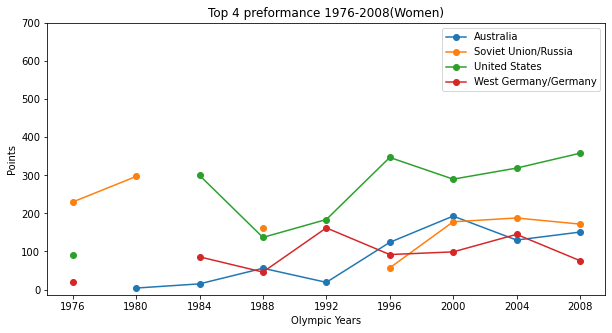

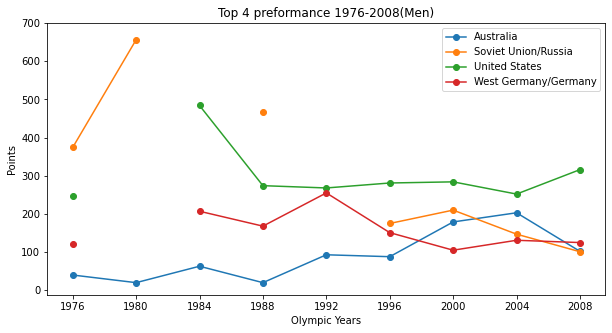

In [47]:
#create a line plot for each DataFrame
top_four_points_w_df.unstack().plot(figsize=(10,5), marker = "o")
#get list of years for x axis
year = top_four["Year"].unique()
ypoint = [0, 100, 200, 300, 400, 500, 600, 700]
plt.xticks(year)
plt.yticks(ypoint)
plt.xlabel("Olympic Years")
plt.ylabel("Points")
plt.title("Top 4 preformance 1976-2008(Women)")
plt.legend(["Australia","Soviet Union/Russia", "United States", "West Germany/Germany"])
plt.savefig("images/top_four_w_preformance.png")

plt.show()

#create a line plot
top_four_points_m_df.unstack().plot(figsize=(10,5), marker = "o")
#get list of years for x axis
year = top_four["Year"].unique()
plt.xticks(year)
plt.yticks(ypoint)
plt.xlabel("Olympic Years")
plt.ylabel("Points")
plt.title("Top 4 preformance 1976-2008(Men)")
plt.legend(["Australia","Soviet Union/Russia", "United States", "West Germany/Germany"])
plt.savefig("images/top_four_m_preformance.png")

plt.show()

# Comparing the Results of Countries Pre- and Post- Extreme Regime Changes

There were 15 countries in the Soviet Union: Armenia, Azerbaijan, Belarus, Estonia, Georgia, Kazakhstan, Kyrgyzstan, Latvia, Lithuania, Moldova, Russia, Tajikistan, Turkmenistan, Ukraine, and Uzbekistan (https://www.infobloom.com/which-countries-were-part-of-the-soviet-union.htm). East and West Germany became one united Germany. This section looks at the performance of the Soviet Union's perforance during the olympics pre-1996 (since it collapsed in 1991, but the countries competed together in 1992) and compares it to the performance of these 15 countries from 1992 on. Similarly, the performances of East and West Germany during the olympics pre-1992 (since they unified in 1990 (https://www.history.com/this-day-in-history/east-and-west-germany-reunite-after-45-years)) will be compared to the performance of Germany from 1992 on. - Kaylie S.

In [48]:
#seeing which countries appear on the list
olympics_data["Country"].sort_values().unique()

array(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus',
       'Belgium', 'Bermuda*', 'Brazil', 'Bulgaria', 'Burundi', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Czechoslovakia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'East Germany', 'Ecuador', 'Egypt', 'Eritrea', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guyana', 'Hong Kong*', 'Hungary', 'Iceland',
       'Independent Olympic Participants (1992)', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kenya', 'Korea, North', 'Korea, South', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia',
       'Malaysia', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia',
       'Morocco', 'Mozambique', 'Namibia', 'Netherlands'

We can see from above that from 1992 to 2008, Turkmenistan did not win a medal at all, and will not be included in the analysis until the end.

In [49]:
#group the olymics data by country
country_olympics_data = olympics_data.groupby("Country")

#pull the data for the Soviet Union and former Soviet countries into separate dataframes
soviet_data = country_olympics_data.get_group("Soviet Union").reset_index()
armenia_data = country_olympics_data.get_group("Armenia").reset_index()
azerbaijan_data = country_olympics_data.get_group("Azerbaijan").reset_index()
belarus_data = country_olympics_data.get_group("Belarus").reset_index()
estonia_data = country_olympics_data.get_group("Estonia").reset_index()
georgia_data = country_olympics_data.get_group("Georgia").reset_index()
kazakhstan_data = country_olympics_data.get_group("Kazakhstan").reset_index()
kyrgyzstan_data = country_olympics_data.get_group("Kyrgyzstan").reset_index()
latvia_data = country_olympics_data.get_group("Latvia").reset_index()
lithuania_data = country_olympics_data.get_group("Lithuania").reset_index()
moldova_data = country_olympics_data.get_group("Moldova").reset_index()
russia_data = country_olympics_data.get_group("Russia").reset_index()
tajikistan_data = country_olympics_data.get_group("Tajikistan").reset_index()
ukraine_data = country_olympics_data.get_group("Ukraine").reset_index()
uzbekistan_data = country_olympics_data.get_group("Uzbekistan").reset_index()

#pull the data for East, West, and united Germany into separate dataframes
east_germany_data = country_olympics_data.get_group("East Germany").reset_index()
west_germany_data = country_olympics_data.get_group("West Germany").reset_index()
germany_data = country_olympics_data.get_group("Germany").reset_index()

In [50]:
#saving pre and post collapse countries to lists
pre_collapse_dfs = [soviet_data, east_germany_data, west_germany_data]
post_collapse_dfs = [armenia_data, azerbaijan_data, belarus_data, estonia_data, georgia_data, kazakhstan_data, kyrgyzstan_data, 
                latvia_data, lithuania_data, moldova_data, russia_data, tajikistan_data, ukraine_data, uzbekistan_data, germany_data]

Here, the total medal counts for the country, regardless of year, are calculated.

In [51]:
#lists for countries and medal counts
countries_pre = []
golds_pre = []
silvers_pre = []
bronzes_pre = []

countries_post = []
golds_post = []
silvers_post = []
bronzes_post = []

#create functions to give a total medal count
def total_medal_count_pre(df):
    #convert medal counts to dictionary
    counts = df["Medal"].value_counts().to_dict()
    countries_pre.append(df["Country"][0])
    #get the value of each key to append to the lists, with "0" appending if no value exists
    golds_pre.append(counts.get(("Gold"), 0))
    silvers_pre.append(counts.get(("Silver"), 0))
    bronzes_pre.append(counts.get(("Bronze"), 0))
    
def total_medal_count_post(df):
    #convert medal counts to dictionary
    counts = df["Medal"].value_counts().to_dict()
    countries_post.append(df["Country"][0])
    #get the value of each key to append to the lists, with "0" appending if no value exists
    golds_post.append(counts.get(("Gold"), 0))
    silvers_post.append(counts.get(("Silver"), 0))
    bronzes_post.append(counts.get(("Bronze"), 0))
    
#running the function on all countries
for country in pre_collapse_dfs:
    total_medal_count_pre(country)
    
for country in post_collapse_dfs:
    total_medal_count_post(country)

Below we are comparing East and West Germany(1976-1988) to Germany (1992-2008).

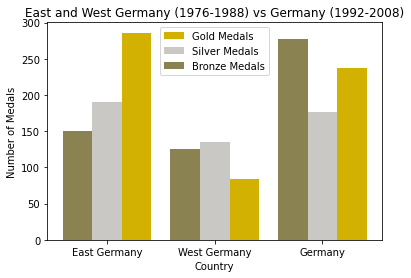

In [52]:
#setting up Germany comparison
german_comparison = {
    "Countries": [countries_pre[1], countries_pre[2], countries_post[-1]],
    "Golds": [golds_pre[1], golds_pre[2], golds_post[-1]],
    "Silvers": [silvers_pre[1], silvers_pre[2], silvers_post[-1]],
    "Bronzes": [bronzes_pre[1], bronzes_pre[2], bronzes_post[-1]],
}

#plotting germany comparison
width = 0.275
x_germ = np.array(range(len(pre_collapse_dfs)))

plt.bar(x_germ + width, german_comparison["Golds"], width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_germ, german_comparison["Silvers"], width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_germ - width, german_comparison["Bronzes"], width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_germ, german_comparison["Countries"])
plt.title("East and West Germany (1976-1988) vs Germany (1992-2008)")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/german_separate_comparison.png", bbox_inches="tight")
plt.show()

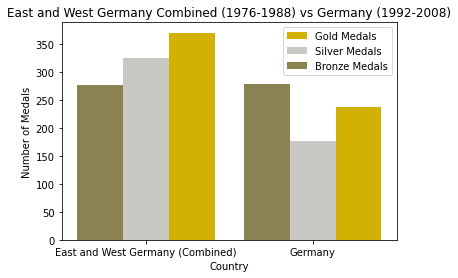

In [53]:
#combining east and west germany stats
ew_germany = "East and West Germany (Combined)"
ew_golds = sum(golds_pre[1:])
ew_silvers= sum(silvers_pre[1:])
ew_bronzes = sum(bronzes_pre[1:])

combined_german_comparison = {
    "Countries": [ew_germany, countries_post[-1]],
    "Golds": [ew_golds, golds_post[-1]],
    "Silvers": [ew_silvers, silvers_post[-1]],
    "Bronzes": [ew_bronzes, bronzes_post[-1]],
}

#plotting germany comparison
width = 0.275
x_germ_com = np.array(range(2))

plt.bar(x_germ_com + width, combined_german_comparison["Golds"], width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_germ_com, combined_german_comparison["Silvers"], width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_germ_com - width, combined_german_comparison["Bronzes"], width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_germ_com, combined_german_comparison["Countries"])
plt.title("East and West Germany Combined (1976-1988) vs Germany (1992-2008)")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/german_combined_comparison.png", bbox_inches="tight")
plt.show()

Below we are comparing the Soviet Union (1976-1988) to all the former Soviet countries (1992-2008).

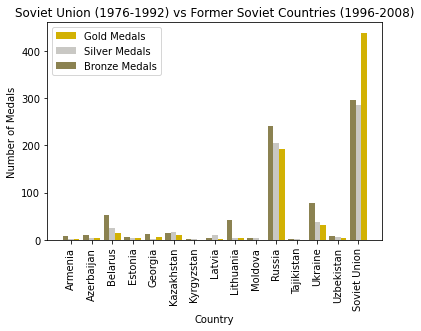

In [54]:
#setting up Soviet comparison
soviet_countries = countries_post[:-1]
soviet_countries.append(countries_pre[0])
soviet_golds = golds_post[:-1]
soviet_golds.append(golds_pre[0])
soviet_silvers = silvers_post[:-1]
soviet_silvers.append(silvers_pre[0])
soviet_bronzes = bronzes_post[:-1]
soviet_bronzes.append(bronzes_pre[0])

#plotting soviet comparison
width = 0.275
x_sov = np.array(range(len(post_collapse_dfs)))

plt.bar(x_sov + width, soviet_golds, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_sov, soviet_silvers, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_sov - width, soviet_bronzes, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_sov, soviet_countries, rotation=90)
plt.title("Soviet Union (1976-1992) vs Former Soviet Countries (1996-2008)")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/soviet_separate_comparison.png", bbox_inches="tight")
plt.show()

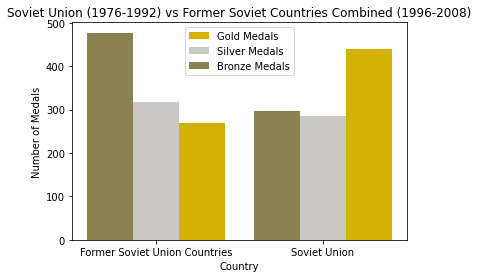

In [55]:
#combining post soviet country data
post_soviet_countries = ["Former Soviet Union Countries", "Soviet Union"]
post_soviet_golds = [sum(golds_post[:-1]), golds_pre[0]]
post_soviet_silvers = [sum(silvers_post[:-1]), silvers_pre[0]]
post_soviet_bronzes = [sum(bronzes_post[:-1]), bronzes_pre[0]]

#plotting soviet comparison
width = 0.275
x_sov_combined = np.array(range(2))

plt.bar(x_sov_combined + width, post_soviet_golds, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_sov_combined, post_soviet_silvers, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_sov_combined - width, post_soviet_bronzes, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_sov_combined, post_soviet_countries)
plt.title("Soviet Union (1976-1992) vs Former Soviet Countries Combined (1996-2008)")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/soviet_combined_comparison.png", bbox_inches="tight")
plt.show()

Below we have the data grouped by pre-Soviet collapse (1976-1988) and post-Soviet collapse (1992-2008).

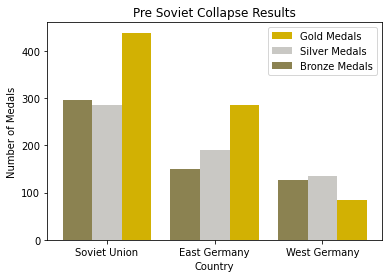

In [56]:
#plotting pre-collapse comparisons
width = 0.275
x_pre = np.array(range(len(pre_collapse_dfs)))

plt.bar(x_pre + width, golds_pre, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_pre, silvers_pre, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_pre - width, bronzes_pre, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_pre, countries_pre)
plt.title("Pre Soviet Collapse Results")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/pre_collapse_comparison.png", bbox_inches="tight")
plt.show()

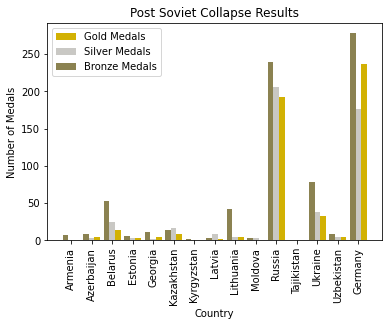

In [57]:
#plotting post-collapse comparisons
width = 0.275
x_post = np.array(range(len(post_collapse_dfs)))

plt.bar(x_post + width, golds_post, width=width, color="#d2b103", label="Gold Medals")
plt.bar(x_post, silvers_post, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(x_post - width, bronzes_post, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(x_post, countries_post, rotation=90)
plt.title("Post Soviet Collapse Results")
plt.ylabel("Number of Medals")
plt.xlabel("Country")
plt.legend()

plt.savefig("images/post_collapse_comparison.png", bbox_inches="tight")
plt.show()

Below, we're comparing the overall points values of the medals for the Soviet Union and former Soviet countries, then comparing the total medal values for East and West Germany to unified Germany.

In [58]:
#finding the total value of the points for each country
#setting lists to hold medal points totals
pre_collapse_points = []
post_collapse_points = []

#running through pre collapse countries to pull points
for df in pre_collapse_dfs:
    points = df["Points"].sum()
    pre_collapse_points.append(points)
    
#running through post collapse countries to pull points
for df in post_collapse_dfs:
    points = df["Points"].sum()
    post_collapse_points.append(points)

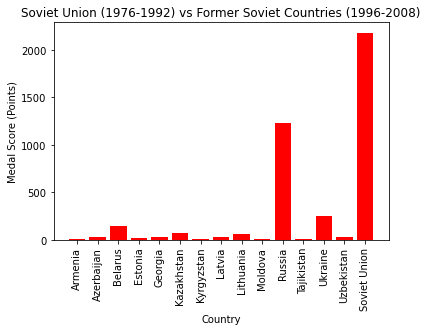

In [59]:
#comparing Soviet countries to the USSR
soviet_countries_points = post_collapse_points[:-1]
soviet_countries_points.append(pre_collapse_points[0])

#some plot data pulled from previous plots
plt.bar(x_sov, soviet_countries_points, color="r")
plt.xticks(x_sov, soviet_countries, rotation=90)
plt.title("Soviet Union (1976-1992) vs Former Soviet Countries (1996-2008)")
plt.ylabel("Medal Score (Points)")
plt.xlabel("Country")

plt.savefig("images/soviet_separate_comparison_by_points.png", bbox_inches="tight")
plt.show()

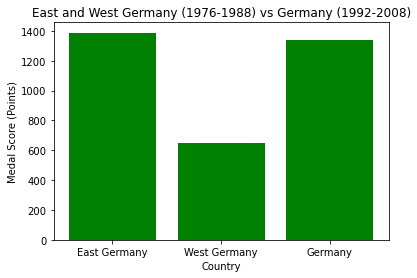

In [60]:
#comparing Germany to East and West Germany
germ_countries_points = pre_collapse_points[1:]
germ_countries_points.append(post_collapse_points[-1])

#plotting
plt.bar(x_germ, germ_countries_points, color="g")
plt.xticks(x_germ, german_comparison["Countries"])
plt.title("East and West Germany (1976-1988) vs Germany (1992-2008)")
plt.ylabel("Medal Score (Points)")
plt.xlabel("Country")

plt.savefig("images/german_separate_comparison_by_points.png", bbox_inches="tight")
plt.show()

# Top Performers the Year the Event is Introduced

This section looks at every sport the year it was introduced and returns the country that won the gold for that event.

In [61]:
#group the data by event
events_data = olympics_data.groupby("Event")
#get the first year for each event and save it to a list
first_years = events_data["Year"].first()
#dictionary of first year, sport, gender, and country
first_golds = {}

#running through the dataframe and the first years to get the remaining data
for index, row in olympics_data.iterrows():
    for name, value in first_years.items():
        if row["Event"] == name and row["Year"] == value and row["Medal"] == "Gold":
            first_golds[name] = [row["Year"], row["Gender"], row["Country"]]

In [62]:
#creating a summary dataframe
first_gold_countries = pd.DataFrame.from_dict(first_golds, orient="index", columns=["Year", "Gender", "Country"])
first_gold_countries

,Year,Gender,Country
3m springboard,1976.0,Women,United States
10m platform,1976.0,Men,Italy
4x100m freestyle relay,1976.0,Women,United States
4x100m medley relay,1976.0,Women,East Germany
800m freestyle,1976.0,Women,East Germany
...,...,...,...
marathon 10km,2008.0,Men,Netherlands
Laser Radial - One Person Dinghy,2008.0,Women,United States
RS:X - Windsurfer,2008.0,Men,New Zealand
Finn - Heavyweight Dinghy,2008.0,Men,United Kingdom


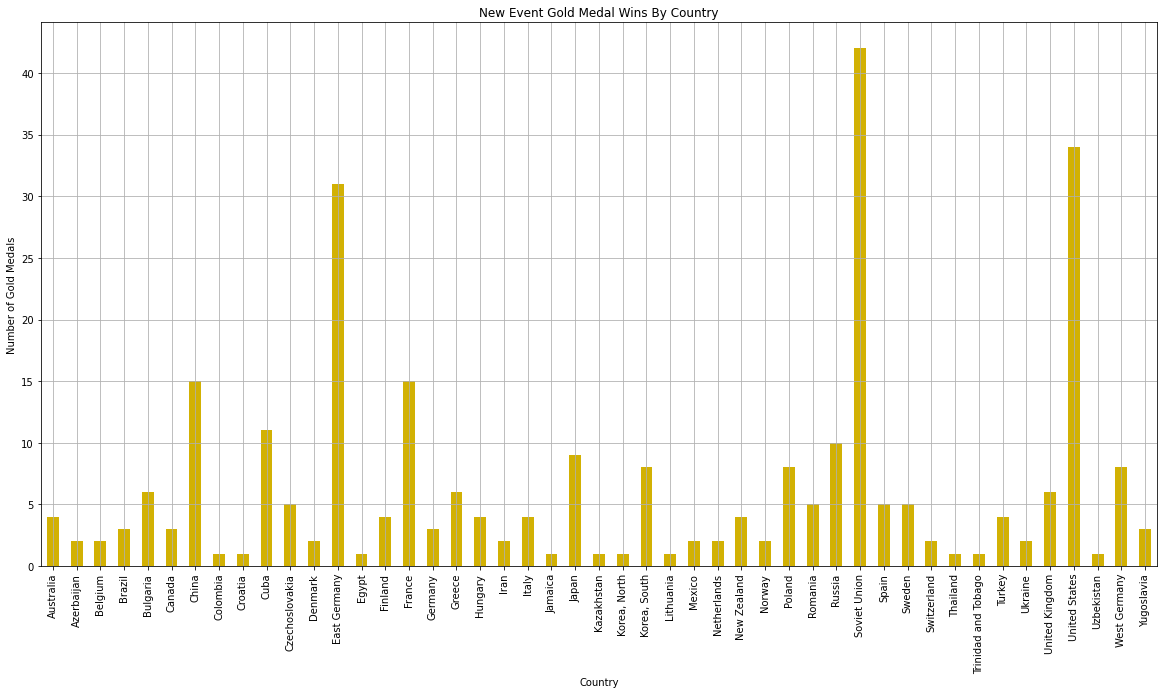

In [63]:
#group the first gold winners by country
country_wins = first_gold_countries.groupby("Country").count()["Year"]
#plot the results in a pie chart
country_wins.plot(kind="bar", x="country", title="New Event Gold Medal Wins By Country", figsize=(20, 10), 
                  rot=90, color="#d2b103", grid=True)
plt.ylabel("Number of Gold Medals")

plt.savefig("images/new_event_golds_by_country.png", bbox_inches="tight")
plt.show()

# Gender Comparison

In [64]:
#making a dataframe with males and females and their numbers
gender = olympics_data["Gender"].value_counts()
total = olympics_data["Gender"].count()
gender_percent = gender/total
#total
df_gender = pd.DataFrame({
    "Total Count" : gender,
    "Percentage of Athlete" : gender_percent,})
df_gender["Percentage of Athlete"] = df_gender["Percentage of Athlete"].map(('{:.2%}').format)


df_gender

,Total Count,Percentage of Athlete
Men,9388,61.30%
Women,5928,38.70%


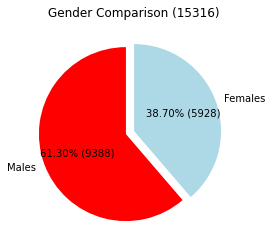

In [65]:
#pie chart for total distruption of males and females, including duplicates
mf_count = olympics_data["Gender"].value_counts()

labels = ["Males" , "Females"]
sizes = mf_count.values
colors = ["red" , "lightblue"]
explode = [0.1 , 0]

#formatting
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=make_autopct(sizes),  startangle=90)

plt.title(f"Gender Comparison ({total})")
plt.savefig("images/GC_all.png", bbox_inches="tight" )
plt.show()



In [66]:
#no dup on athlete name
athlete = olympics_data.drop_duplicates(["Athlete"])
#len(athlete)
dup_gender = pd.DataFrame(athlete)
#dup_gender
gender_1 = dup_gender["Gender"].value_counts()
total_1 = dup_gender["Gender"].count()
gender_percent = gender_1/total_1
#total
gender_df = pd.DataFrame({
    "Total Count" : gender_1,
    "Percentage of Athlete" : gender_percent,})
gender_df["Percentage of Athlete"] = gender_df["Percentage of Athlete"].map(('{:.2%}').format)


gender_df

,Total Count,Percentage of Athlete
Men,7130,62.89%
Women,4207,37.11%


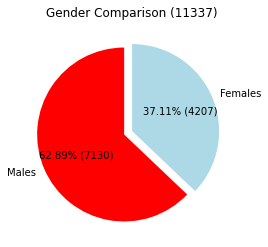

In [67]:
#pie chart for unique athlete
labels = ["Males" , "Females"]
sizes = gender_1
colors = ["red" , "lightblue"]
explode = [0.1 , 0]

#formatting
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=make_autopct(sizes),  startangle=90)

plt.title(f"Gender Comparison ({total_1})")
plt.savefig("images/GC_unique.png", bbox_inches="tight")

plt.show()

# Most Decorated Athlete

In [68]:
#making a dataframe, grouping it by athlete and adding medals, points and gender to it
top_medalist = olympics_data[["Athlete" , "Medal"]].groupby("Athlete").count()
#print(top_medalist)
top_medalist["Gender"] = olympics_data[["Athlete", "Gender"]].groupby("Athlete").first()
#top_medalist["Medal Earned"] = olympics_data[["Athlete", "Medal"]].groupby("Athlete").sum()
top_medalist["Total Points"] = olympics_data[["Athlete", "Points"]].groupby("Athlete").sum()
top_medalist = top_medalist.sort_values(["Total Points"], ascending=False)[:10]

top_medalist.head(10)

,Medal,Gender,Total Points
Athlete,,,
"PHELPS, Michael",16,Men,44.0
"FISCHER, Birgit",12,Women,32.0
"THOMPSON, Jenny",12,Women,31.0
"BIONDI, Matthew",11,Men,29.0
"LEWIS, Carl",10,Men,29.0
"ANDRIANOV, Nikolay",12,Men,28.0
"TORRES, Dara",12,Women,24.0
"HALL, Gary Jr.",10,Men,23.0
"THORPE, Ian",9,Men,22.0


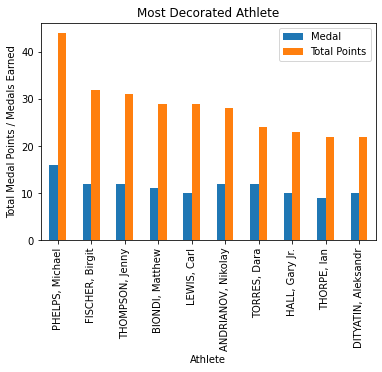

In [69]:
#medal_points = top_medalist["Total Points"][:10]
#plotting the graph of medals and points with names
top_medalist.plot(kind = 'bar')
plt.title("Most Decorated Athlete")
plt.ylabel("Total Medal Points / Medals Earned")

plt.savefig("images/MostDeco.png", bbox_inches="tight")

In [70]:
#running a for loop to grab all the gold silver and bronze data into each index of names
name_list = top_medalist.index

rough_dict = {}
for name in name_list:
    rough_dict[name] = {'Gold': 0, 'Silver': 0, 'Bronze': 0}
    olympian = olympics_data[olympics_data['Athlete'] == name]
    for  index, value in olympian.iterrows():
        if 'gold' in value['Medal'].lower():
            rough_dict[name]['Gold'] += 1
            continue
        if 'silver' in value['Medal'].lower():
            rough_dict[name]['Silver'] += 1
            continue
        if 'bronze' in value['Medal'].lower():
            rough_dict[name]['Bronze'] += 1
            continue
athlete_medal = pd.DataFrame.from_dict(rough_dict).T
athlete_medal.head()

,Gold,Silver,Bronze
"PHELPS, Michael",14,0,2
"FISCHER, Birgit",8,4,0
"THOMPSON, Jenny",8,3,1
"BIONDI, Matthew",8,2,1
"LEWIS, Carl",9,1,0


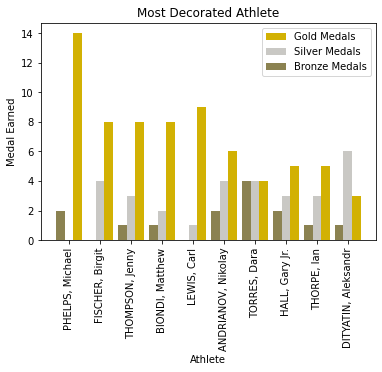

In [71]:
#athlete_medal.plot(kind = 'bar')
name = np.array(range(len(athlete_medal)))
gold = athlete_medal["Gold"]
silver = athlete_medal["Silver"]
bronze = athlete_medal["Bronze"]
width = 0.275
#plotting the graph with color coding
plt.bar(name + width, gold, width=width, color="#d2b103", label="Gold Medals")
plt.bar(name, silver, width=width, color="#c9c8c4", label="Silver Medals")
plt.bar(name - width, bronze, width=width, color="#8b8251", label="Bronze Medals")
plt.xticks(name, athlete_medal.index, rotation=90)
plt.title("Most Decorated Athlete")
plt.xlabel("Athlete")
plt.ylabel("Medal Earned")
plt.legend()

plt.savefig("images/MostDeco_medal.png", bbox_inches="tight")

In [72]:
#load in csv
olympics_data = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding="latin-1")
olympics_data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [73]:
# Assign Medal Counts
medal_dict = {'Gold':3,'Silver':2,'Bronze':1}
olympics_data['Points'] = olympics_data['Medal'].map(medal_dict)

In [74]:
# Load in Host Country CSV, merge with Olympics Data Frame
host_country_df = pd.read_csv('resources/Host_Countries.csv')
host_country_df = host_country_df[['Year','Country']]
host_country_df.rename(columns={'Country':'Host Country'},inplace=True)
olympics_data = olympics_data.merge(host_country_df,on='Year')

In [75]:
# Get pt Total DF by year
pt_total_df = olympics_data.groupby('Year').sum()

In [76]:
# Find Host Years and Host City, Country

host_years = olympics_data['Year'].unique()

year_countries_dict = {}
for i in host_years:
    if i == 1988.0:
        year_countries_dict[i] = 'Korea, South'
    elif i == 1980.0:
        year_countries_dict[i] = 'Soviet Union'
    else:
        year_countries_dict[i] = olympics_data[olympics_data['Year']==i]['Host Country'].unique()[0]
        
# Create DF with only host countries

host_countries = []
for k,v in year_countries_dict.items():
    host_countries.append(v)

host_df = olympics_data[olympics_data['Country'].isin(host_countries)]

# Build Data Frame with a Year index and Host Country Point Totals as Columns

frame = pd.DataFrame(index=host_years)

for year in host_years:
    country = year_countries_dict[year]

    to_add = host_df[host_df['Country']==country].groupby('Year').sum()
    to_add.rename(columns={'Points':country},level=0,inplace=True)
    frame = frame.merge(to_add,how='outer',left_index=True,right_index=True)

frame.rename(columns={'United States_x':'United States'},inplace=True)
frame = frame[['Canada','Soviet Union','United States','Korea, South','Spain','Australia','Greece','China']]

In [77]:
# Get Soviet Union/Russia Point Totals. Fill DF

sov_union = olympics_data[olympics_data['Country']=='Soviet Union'].groupby('Year').sum()
russia = olympics_data[olympics_data['Country']=='Russia'].groupby('Year').sum()
unif_team = olympics_data[olympics_data['Country']=='Unified team'].groupby('Year').sum()

sov_union_russia = sov_union.append(russia)
sov_union_russia = sov_union_russia.append(unif_team)
sov_union_russia = sov_union_russia.sort_index()

l = sov_union_russia['Points'].values
sov_rus_pts = []

for i in range(2):
    sov_rus_pts.append(float(l[i]))
sov_rus_pts.append(np.nan)
for i in range(2,8):
    sov_rus_pts.append(float(l[i]))

frame['Soviet Union/Russia'] = sov_rus_pts

frame = frame[['Canada', 'Soviet Union/Russia', 'United States', 'Korea, South', 'Spain',
       'Australia', 'Greece', 'China']]

In [78]:
frame

,Canada,Soviet Union/Russia,United States,"Korea, South",Spain,Australia,Greece,China
1976.0,28.0,604.0,337.0,20.0,12.0,40.0,NaN,NaN
1980.0,NaN,953.0,NaN,NaN,47.0,24.0,7.0,NaN
1984.0,159.0,NaN,784.0,83.0,37.0,78.0,3.0,141.0
1988.0,34.0,627.0,411.0,170.0,9.0,76.0,1.0,81.0
1992.0,103.0,472.0,452.0,110.0,174.0,112.0,6.0,165.0
1996.0,98.0,232.0,628.0,135.0,136.0,212.0,20.0,222.0
2000.0,43.0,388.0,574.0,123.0,69.0,372.0,32.0,180.0
2004.0,33.0,335.0,571.0,108.0,50.0,333.0,65.0,225.0
2008.0,69.0,273.0,674.0,171.0,133.0,253.0,10.0,385.0


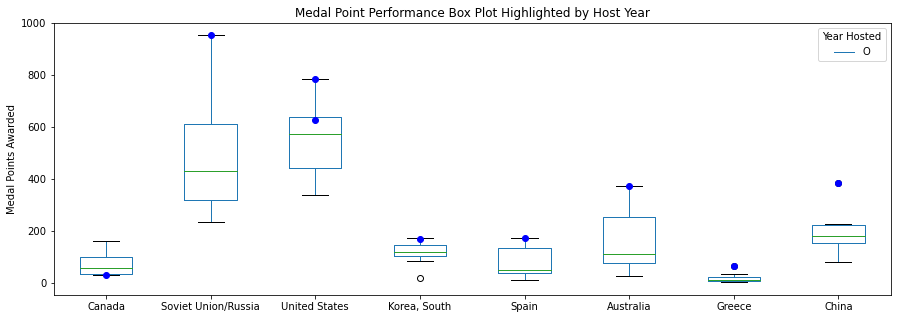

In [79]:
# Boxplot by Host Country

x = ['Canada', 'Soviet Union/Russia', 'United States', 'Korea, South', 'Spain',
       'Australia', 'Greece', 'China']
y = [28,953,784,628,170,174,372,65,385]

frame[frame.columns].plot(kind='box',figsize=(15,5))
plt.title('Medal Point Performance Box Plot Highlighted by Host Year')
plt.ylabel('Medal Points Awarded')
# plt.xlabel('Host Countries from 1976 - 2008')
plt.plot([1,2,3,3,4,5,6,7,8],y,'bo')

plt.legend(labels='O'[0],title='Year Hosted');

plt.savefig('images/Host_Country_Box_Plot.png',bbox_inches='tight')

In [80]:
# Geographical Plotting

host_country_df['City'] = olympics_data['City'].unique()
host_country_df['Search'] = host_country_df['City']+', '+host_country_df['Host Country']

# Get Lat and Long

from config import g_key

city_dict = {}

search_items = []
for i in host_country_df['Search'].values:
    search_items.append(i)

# Build URL using the Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

for item in search_items:
    
    params = {"address": item, "key": g_key}
    
    response = requests.get(base_url, params=params)

    geo = response.json()

    lat = geo["results"][0]["geometry"]["location"]["lat"]
    lng = geo["results"][0]["geometry"]["location"]["lng"]

    city_dict[item] = (lat,lng)
    
# Build Lat and Lng in DataFrame

host_country_df['LAT'] = host_country_df['Search'].apply(lambda x: city_dict[x][0])
host_country_df['LNG'] = host_country_df['Search'].apply(lambda x: city_dict[x][1])

In [81]:
# Find Missing Years

missing_years = {'Canada':[], 'Soviet Union/Russia':[], 'United States':[], 'Korea, South':[],
       'Spain':[], 'Australia':[], 'Greece':[], 'China':[]}

for k in missing_years:
    try:
        y = frame[frame[k].isna()==True][k].index[0]
        missing_years[k].append(y)
    except:
        pass

In [82]:
# Inport new dependencies

import math
import gmaps

In [83]:
# Build Function to Calc Weights for Heat Map

def Build_weights(country_select='United States',metric='average'):
    
    country_points = []

    country_mean = frame[country_select].mean()

    for pts in frame[country_select]:
        country_points.append(pts)

    weight = []

    if metric == 'average':

        met = frame[country_select].mean()

        for i in range(9):
            if math.isnan(country_points[i])==True:
                met = .01
                weight.append(met)
            else:
                met = (country_points[i]/country_mean)*100
                weight.append(met)

    if metric == 'percent':
        count = olympics_data.groupby('Year').sum()

        d = count.to_dict()
        d = d['Points'].values()
        avges = []
        for i in d:
            avges.append(i)

        for i in range(9):
            if math.isnan(country_points[i])==True:
                met = .01
                weight.append(met)
            else:
                met = (country_points[i]/avges[i])*100
                weight.append(met)
                    
    return weight

In [84]:
# Show Heatmap of Host Country Point Totals
# Get Country and Weight Method

# ability for user to input which country and metric for heatmap
# country_select = input('What Host Country: ')
# metric = input('(percent) or (average)')

# Find point index from country average or point index from year's points available
weight = Build_weights()

# Build Map         
            
gmaps.configure(api_key=g_key)
locations = host_country_df[["LAT", "LNG"]]


# Plot Heatmap
fig = gmaps.figure()
fig.figzize=(15,5)

# Create heat layer

heat_layer = gmaps.heatmap_layer(locations, weights=weight,
                                 dissipating=False, max_intensity=max(weight),
                                 point_radius=5)

# Add layer
fig.add_layer(heat_layer)

# Display figure

fig

Figure(layout=FigureLayout(height='420px'))